## Predict a car's market price

This is a guided project to predict a car's market price using K-nearest neighbors algorithm. The data set contains information about different cars and for each cars technical aspects such as weight of the car, miles per gallon, accerleration, ect.

Attribute Information:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv("imports-85.data")

In [3]:
#Display the 3 rows of the dataframe
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


From the data frame it shows that their is no header with column names, so correct column names have to be added to the dataframe.

In [4]:
cars.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors",
 "body-style","drive-wheels","engine-location","wheel-base","length","width","height",
 "curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke",
 "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
#Display the rows and columns of the dataframe
cars.shape

(204, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-nul

### Data Cleaning

In [7]:
#getting only the numeric columns
numeric_col = ["normalized-losses","wheel-base","length","width","height",
 "curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
cars_numeric = cars[numeric_col]
cars_numeric.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950


In [9]:
cars_numeric = cars_numeric.replace("?",np.nan)

In [10]:
cars_numeric.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950


In [11]:
cars_numeric["normalized-losses"] = cars_numeric["normalized-losses"].astype("float")

In [12]:
#cheking for null values
cars_numeric.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* For the normalized-losses column Na values will replace with mean value of the column.
* bore and stroke columns will replace with the mean value of the column.
* horsepower and peak-rpm will also replace the null values with the mean of the column.
* We will be dropping the 4 null rows in price column since we need to use the price column as the target.

In [13]:
#deleting the missing value rows from the price column
cars_numeric = cars_numeric.dropna(axis = 0, subset = ["price"])

In [14]:
cars_numeric["price"] = cars_numeric["price"].astype("int")

In [15]:
cars_numeric.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [16]:
#Replace other NA values in columns with the mean values
cars_numeric = cars_numeric.astype("float")
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [17]:
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
#normalize all columns except the target column.
price_col = cars_numeric["price"]
norm_cars = (cars_numeric - cars_numeric.min())/(cars_numeric.max() - cars_numeric.min())
norm_cars["price"] = price_col

In [19]:
norm_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0


## Univariate Model

Funtion named knn_train_test is created to take 4 parameters such as training column name, target column name, dataframe and the k value. The funtion will split the data set into training and test data using train_test_split and return the root mean squared error value for each column.

For this funtion we will take the default k value 5 for n_neighbors and store the resulting rmse values in a dictionary named rmse_k5.

The test size is as 0.5 as per guided project.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df,k):
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
   
    x = rand_df[[train_col]]
    y = rand_df[target_col]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    mse = mean_squared_error(y_test,predictions)
    rmse = mse ** (1/2)
    return rmse
 

In [22]:
#Cheking the rmse values for each columns when k is 5 
columns = norm_cars.columns.drop("price")
rmse_k5 = {}

for col in columns:
    results = knn_train_test(col,"price",norm_cars,5)
    rmse_k5[col] = results
    
#create a series from the dictionary and sort the results
rmse_k5_series = pd.Series(rmse_k5)
rmse_k5_series.sort_values()

engine-size          3041.916047
city-mpg             3576.958360
curb-weight          4164.021046
width                4385.216104
horsepower           4767.422650
highway-mpg          4976.551164
compression-ratio    5863.325407
length               6136.108248
wheel-base           6419.941957
bore                 6898.342295
stroke               7642.414472
normalized-losses    7733.776960
height               7934.959113
peak-rpm             8066.263068
dtype: float64

### Test Univariate model using K values 1, 3, 5, 7 and 9

The function model is then changed as knn_train_test_2. This funtion is to use different k values for the n_neighbors (1,3,5,7,9) and check the performace for each column with the k values.

Then visualize the result using a plot.

In [23]:
# The funtion name is as knn_train_test_2
from collections import OrderedDict

def knn_train_test_2(train_col,target_col,df):
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    y = rand_df[target_col]
    x = rand_df[[train_col]]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)
    
    k_val = [1,3,5,7,9]
    rmse_dict = OrderedDict()
    #rmse_dict = {}
    
    for k in k_val:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(x_train, y_train)
        predictions = knn.predict(x_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = mse ** (1/2)
        
        rmse_dict[k] = rmse
        
    return rmse_dict

In [26]:
col_dict = {}
train_columns = norm_cars.columns.drop("price")

for col in train_columns:
    k_res = knn_train_test_2(col,"price",norm_cars)
    col_dict[col] = k_res

col_dict

{'bore': OrderedDict([(1, 8456.918178627484),
              (3, 6849.299853837455),
              (5, 7446.514846100826),
              (7, 7598.761485268504),
              (9, 7177.828016456452)]),
 'city-mpg': OrderedDict([(1, 5762.043301642222),
              (3, 5543.972458846133),
              (5, 4423.6780809186375),
              (7, 4145.91396112621),
              (9, 4348.037699474256)]),
 'compression-ratio': OrderedDict([(1, 8116.856743838714),
              (3, 6244.444570353894),
              (5, 5902.645704868284),
              (7, 5624.939077511354),
              (9, 5243.435928654152)]),
 'curb-weight': OrderedDict([(1, 4983.537601945028),
              (3, 4589.687109887412),
              (5, 4261.191439351205),
              (7, 4600.605114702692),
              (9, 4816.848066582879)]),
 'engine-size': OrderedDict([(1, 4581.800925400404),
              (3, 3807.3869536001257),
              (5, 3063.1785976008646),
              (7, 3371.6265920659916),
      

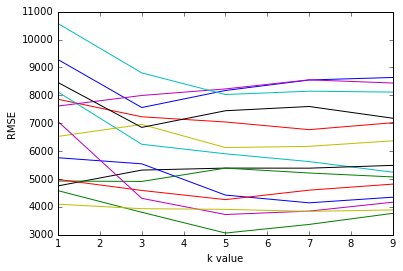

In [27]:
for k,v in col_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


def knn_train_test_cols(train_col,target_col,df,k):
    y = df[target_col]
    x = df[[train_col]]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    mse = mean_squared_error(predictions,y_test)
    rmse = mse ** (1/2)
    return rmse

### Multivariate Model

The the function is modified as knn_train_test_3. The function model is changed to accept more than one column data and k value as 5.
From the previous result will sort the columns names in order with the best rmse results.

Will then use the 2 best features(columns with lowest rmse values) and test a multivariate k-nearest neighbors model.
Then use 3 best features, 4 best features, 5 best features and test the model.

In [28]:
#From the above exploration finding the top 5 columns with the lowest rmse values.
rmse_avg_feature = {}
for v,k in col_dict.items():
    avg_rmse = np.mean(list(k.values()))
    rmse_avg_feature[v] = avg_rmse
    
series_avg_rmse = pd.Series(rmse_avg_feature)
series_avg_rmse.sort_values()    

engine-size          3718.632687
highway-mpg          3935.143205
width                4621.868002
curb-weight          4650.373866
city-mpg             4844.729100
horsepower           5103.667056
wheel-base           5268.125753
compression-ratio    6226.464405
length               6429.798770
stroke               7183.341006
bore                 7505.864476
peak-rpm             8166.161695
normalized-losses    8440.283466
height               8732.813603
dtype: float64

In [29]:
feature_list = list(rmse_avg_feature.keys())
feature_list

['normalized-losses',
 'engine-size',
 'stroke',
 'compression-ratio',
 'peak-rpm',
 'length',
 'wheel-base',
 'city-mpg',
 'horsepower',
 'curb-weight',
 'height',
 'width',
 'highway-mpg',
 'bore']

In [30]:
def knn_train_test_3(train_col,target_col,df,k):
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    x = rand_df[train_col]
    y = rand_df[target_col]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** (1/2)
    return rmse    

In [32]:
features_2 = knn_train_test_3(feature_list[0:2],"price",norm_cars,5)
features_3 = knn_train_test_3(feature_list[0:3],"price",norm_cars,5)
features_4 = knn_train_test_3(feature_list[0:4],"price",norm_cars,5)
features_5 = knn_train_test_3(feature_list[0:5],"price",norm_cars,5)

In [33]:
print("2 best features rmse value: {:.2f}".format(features_2))
print("3 best features rmse value: {:.2f}".format(features_3))
print("4 best features rmse value: {:.2f}".format(features_4))
print("5 best features rmse value: {:.2f}".format(features_5))            

2 best features rmse value: 3754.88
3 best features rmse value: 3852.15
4 best features rmse value: 4905.79
5 best features rmse value: 5347.19


### To check which K value is optimal for each model

we will range the hyperparameter value from 1 to 25 for each model and plot the resulting rmse values and check which k value is optimal for each model from the previous step for the best features. 

In [34]:
def knn_train_test_4(train_col,target_col,df):
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    y = rand_df[target_col]
    x = rand_df[train_col]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)
    
    rmse_dict = OrderedDict()
    #rmse_dict = {}
    
    for k in range(1,25):
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(x_train, y_train)
        predictions = knn.predict(x_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = mse ** (1/2)
        
        rmse_dict[k] = rmse
        
    return rmse_dict

In [37]:
# from the feature_list
optimal_rmse = {}
for k in range(5):
    feat_no = feature_list[0:k+2]
    best_feat = '{} best features'.format(k+2)
    rmse_resu = knn_train_test_4(feat_no,"price",norm_cars)
    optimal_rmse[best_feat] = rmse_resu  

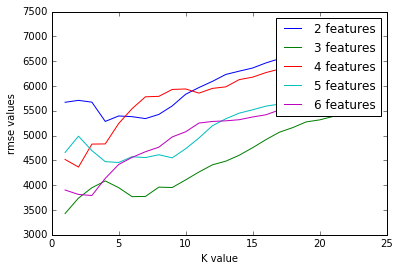

In [38]:
i = 1
for k,v in optimal_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label = "{} features".format(i+1))
    plt.ylabel("rmse values")
    plt.xlabel("K value")
    plt.legend()
    i+=1
plt.show()

## Conclusion

The optimal k values for the different features are as below.
2 features : 4
3 features : 5
4 features : 2
5 features : 4

From the results the optimal value for the k is between 2 to 5 for all 5 features. Over all the the lowest rmse plot is shown from the green plot when using 3 features. The column names in 3 features are 'normalized-losses','engine-size','stroke'. 